# LAB 4 - Semantic Embeddings

## Exercise 2 – Word2vec


### 1. Import spacy library and load the en_core_web_md model


In [1]:
# Install spacy library
!pip install spacy

In [2]:
# Download the English model
import spacy
spacy.cli.download("en_core_web_md")
nlp = spacy.load("en_core_web_md")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### 2. Show the word vector for “football”, how long is it?


In [ ]:
#Get the representation of the word "football"
football = nlp("football")
print(football.vector)
print("\nLength of the vector:", len(football.vector))

[-1.8633e+00  4.2826e+00 -7.1575e-01  1.2353e+00  5.4601e+00  6.0244e+00
 -2.2204e+00  1.7759e+00  2.5588e+00 -2.0682e+00  4.4509e+00 -2.2267e+00
 -1.6666e+00 -1.0174e+00 -5.0303e+00  2.4880e+00  4.0848e-01  1.0369e+00
  3.4916e+00  3.7098e+00  2.2451e+00 -1.1685e+00 -3.2297e-01 -1.6925e+00
  8.3621e-01 -2.6654e-02 -3.7525e+00 -4.9996e-01  5.6734e+00  4.7680e+00
 -3.7574e+00 -1.4604e-01  5.3413e-01 -5.5588e+00  1.1134e+00  3.0370e+00
  6.7387e-01  4.8416e+00 -6.9886e+00 -2.4840e+00  9.1392e-01  3.8642e+00
  4.7409e+00 -9.1215e-01 -4.7876e-01 -4.5356e-01 -2.5983e+00 -2.6529e+00
 -6.0445e+00  6.5456e-01  4.5724e+00  4.7130e+00 -8.7298e-01 -2.4036e+00
  1.3543e+00 -2.4419e-02 -1.6746e+00  5.0430e+00 -7.3322e-01  3.2873e+00
 -8.2850e-01 -1.7169e+00 -1.2998e+00 -5.5582e-01  2.4973e+00  8.2000e-01
 -5.0912e+00  2.9508e+00 -2.6805e+00  1.6948e+00  2.6353e-01 -5.5573e-01
 -2.5534e+00 -7.1705e-01  2.5999e+00 -3.8282e-01 -3.7611e+00  7.0098e+00
 -2.3766e+00 -6.6381e-01 -2.1161e+00 -1.0708e+00 -4

### 3. Show the word vector for “frankfurteria”, how long is it?

Only words in model’s vocabulary have vectors, the rest are called out-ofvocabulary (OOV)

In [ ]:
#Get the representation of the word "frankfurteria" and show the length of the vector

vec_frankfurteria = nlp("frankfurteria").vector

print(vec_frankfurteria)
print("\nLenght of the vector:", len(vec_frankfurteria))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Lenght of the vector: 300


As you can see frankfurteria is an Out Of Vocabulary word since there is no representation for this word

###  4. Check whether the word “flowers” is in the model vocabulary


In [14]:
# Check whether the word "flowers" is in the vocabulary

if "flowers" in nlp.vocab.strings:
  print("The word 'flowers' is in the vocabulary")

else:
  print("The word 'flowers' is not in the vocabulary")

#Get the representation of the word "flowers"
#print(nlp("flowers").vector)

The word 'flowers' is in the vocabulary


### 5. Create a sentence including the word ”football”, and show the sentence vector


In [15]:
sentence = "Football is a great sport"
sent_vec = nlp(sentence).vector
print(sent_vec)

[-0.627118    2.986326   -2.07868    -0.14277804  4.8246202   1.05336
 -0.15930007  3.9424198   0.403222   -0.3256761   9.86448    -0.70506996
 -2.4647799  -0.44493204 -0.20754394  6.27648     2.308614    3.328638
  0.59304     2.1084442   1.256616   -0.72904    -2.327992    0.178924
 -1.0249599  -0.66361797 -2.63138    -2.005578    0.20743999  0.47810602
 -1.1414001   1.29128    -1.4760002  -1.98671    -1.3974241   4.8594823
  0.45134997  1.2118399   0.3723401  -2.70145    -1.396516    3.7277198
  1.584082   -0.70214    -2.290242    2.4136198   3.0021443  -3.6821818
 -1.8240879   1.7877319   0.40824395  0.78881204  2.729428   -3.82346
  1.392914   -0.87467605  1.476174    0.97332    -1.88416     0.9316801
  3.427246   -1.7070881  -0.12384    -1.1805999  -1.094578    1.3526939
 -3.6883998  -5.3641996   2.520658    2.770638   -0.92465436  4.64414
 -6.0251203  -0.78196996 -0.02647798  2.150298   -3.47756     5.74812
 -3.7472908  -0.9868     -6.06982    -2.5494962   0.21887001 -1.606024
 

### 6. How long is the sentence vector? How is it calculated?


In [16]:
print("\nLenght of the vector:", len(sent_vec))


Lenght of the vector: 300


Even if the sentence have many words, the length is 300 because they do the average of the vectors of all the words


## Exercise 3 – Similarity

### 1. Define the two utterances “I visited Scotland” and “I went to Edinburgh”


In [17]:
utt1 = "I visited Scotland"
utt2 = "I went to Edinburgh"
utt1_vec = nlp(utt1).vector
utt2_vec = nlp(utt2).vector

### 2. Calculate the similarity between these two sentences


In [21]:
utt1 = nlp("I visited Scotland")
utt2 = nlp("I went to Edinburgh")

print("The similarity is:", utt1.similarity(utt2))

The similarity is: 0.753202935804182


Another way to compute the similarity

In [19]:
import numpy as np
from numpy.linalg import norm


# compute cosine similarity
cosine = np.dot(utt1_vec,utt2_vec)/(norm(utt1_vec)*norm(utt2_vec))
print("The cosine similarity is:",cosine)



The cosine similarity is: 0.753203


Define two similar sentences and calculate their similarity,
then define two very different sentences and calculate their similarity

In [36]:
# Compute similarities of 2 similar sentences
sent_1 = "I do not like football"
sent_2 = "I hate soccer"
sent_1_vec = nlp(sent_1).vector
sent_2_vec = nlp(sent_2).vector

cosine = np.dot(sent_1_vec,sent_2_vec)/(norm(sent_1_vec)*norm(sent_2_vec))
print(f"The cosine similarity for sentences: 'I do not like football' and 'I hate soccer' is:\n{cosine}")



The cosine similarity for sentences: 'I do not like football' and 'I hate soccer' is:
0.8398776054382324


Even if the sentences seem to be the same maybe the reason why they don't have 100% similiarity is because footbal, in some places, can be interpreted as american footbal, which is different from soccer.

In [42]:
# Compute similarities of 2 dissimilar sentences
sent_1 = "I really hate football"
sent_2 = "My sister loves watching tennis matches"
sent_1_vec = nlp(sent_1).vector
sent_2_vec = nlp(sent_2).vector

cosine = np.dot(sent_1_vec,sent_2_vec)/(norm(sent_1_vec)*norm(sent_2_vec))
print(f"The cosine similarity for sentences: '{sent_1}' and '{sent_2}' is:\n{cosine}")



The cosine similarity for sentences: 'I really hate football' and 'My sister loves watching tennis matches' is:
0.3829220235347748


### 3. Consider the following words [cat, dog, tiger, elephant, bird, monkey, lion, cheetah, burger, pizza, food, cheese, wine, salad, noodles, fruit, vegetables]

In [45]:
word_list = ["cat", "dog", "tiger", "elephant", "bird", "monkey", "lion","cheetah", "burger", "pizza", "food", "cheese", "wine", "salad", "noodles", "fruit", "vegetables"]

### 4. Calculate the word vector for every word




In [46]:
embed_list = []
for word in word_list:
    embed_list.append(nlp(word).vector)

### 5. Apply a PCA, consider the first two components, and represent the words in the feature space

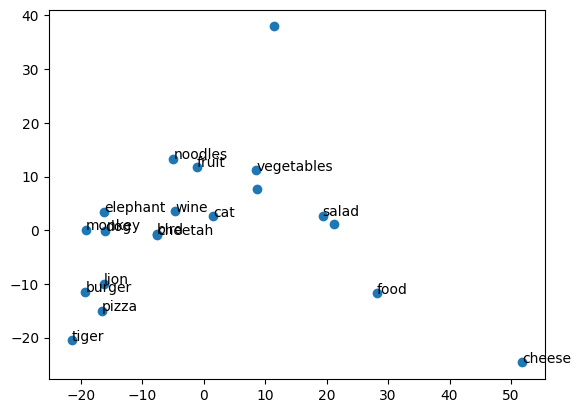

The amount of variance explained by each of the selected components is:
 component 1: 0.2425980346558042
 component 2: 0.12469128690190445

Total variance explained: 0.36728932155770866


In [55]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
embed_pca = pca.fit_transform(embed_list)

x = [vector[0] for vector in embed_pca] # x-axis
y = [vector[1] for vector in embed_pca] # y-axis

plt.scatter(x,y, marker='o') #
for i, word in enumerate(word_list):
    plt.annotate(word, (x[i], y[i]))

plt.show()

#Print the amount of variance explained by each of the selected components
var_explained = pca.explained_variance_ratio_
print(f"The amount of variance explained by each of the selected components is:\n component 1: {var_explained[0]}\n component 2: {var_explained[1]}\n")
print(f"Total variance explained: {sum(var_explained)}")


Now let's do it in 3D (first 3 components)

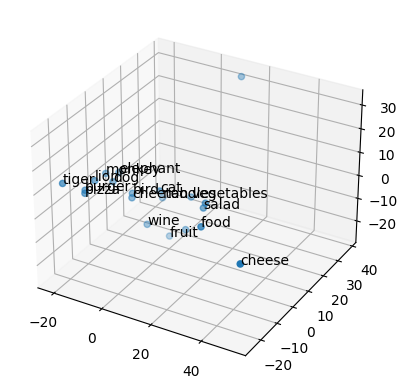

The amount of variance explained by each of the selected components is:
 component 1: 0.2425980346558042
 component 2: 0.12469128690190445
 component 3: 0.0917195774550193
Total variance explained: 0.45900889901272796


In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D PCA

pca = PCA(n_components=3)
embed_pca = pca.fit_transform(embed_list)

x = [vector[0] for vector in embed_pca] # x-axis
y = [vector[1] for vector in embed_pca] # y-axis
z = [vector[2] for vector in embed_pca] # z-axis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, marker='o')

for i, word in enumerate(word_list):
    ax.text(x[i], y[i], z[i], word)

plt.show()

#Print the amount of variance explained by each of the selected components
var_explained = pca.explained_variance_ratio_
print(f"The amount of variance explained by each of the selected components is:\n component 1: {var_explained[0]}\n component 2: {var_explained[1]}\n component 3: {var_explained[2]}")
print(f"Total variance explained: {sum(var_explained)}")


Define a new set of words (at least 20 different words), and
represent them in the feature space

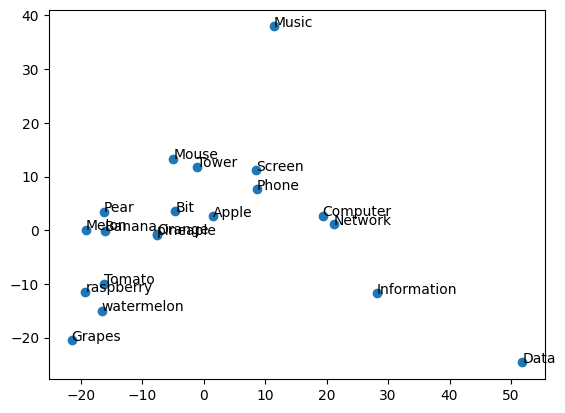

The amount of variance explained by each of the selected components is:
 component 1: 0.2425980346558042
 component 2: 0.12469128690190445

Total variance explained: 0.36728932155770866


In [58]:
common_words = ['Apple', 'Banana', 'Grapes', 'Pear', 'Orange', 'Melon', 'Tomato', 'pineaple',
                'raspberry', 'watermelon', 'Information', 'Data', 'Bit', 'Computer', 'Mouse',
                'Tower', 'Screen', 'Music', 'Network', 'Phone']
embed_list1 =[]
for word1 in common_words:
    embed_list1.append(nlp(word1).vector)
pca = PCA(n_components=2)
embed_pca1 = pca.fit_transform(embed_list1)

x = [vector1[0] for vector1 in embed_pca1] # x-axis
y = [vector1[1] for vector1 in embed_pca1] # y-axis

plt.scatter(x,y, marker='o') #
for i, word1 in enumerate(common_words):
    plt.annotate(word1, (x[i], y[i]))



plt.show()

#Print the amount of variance explained by each of the selected components
var_explained = pca.explained_variance_ratio_
print(f"The amount of variance explained by each of the selected components is:\n component 1: {var_explained[0]}\n component 2: {var_explained[1]}\n")
print(f"Total variance explained: {sum(var_explained)}")


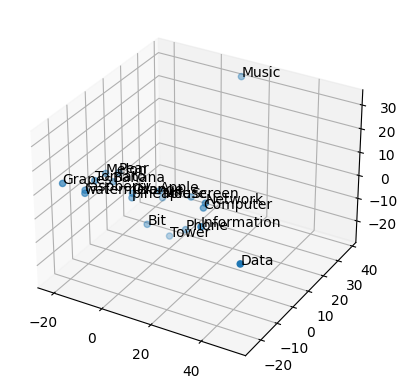

The amount of variance explained by each of the selected components is:
 component 1: 0.2425980346558042
 component 2: 0.12469128690190445
 component 3: 0.0917195774550193
Total variance explained: 0.45900889901272796


In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
common_words = ['Apple', 'Banana', 'Grapes', 'Pear', 'Orange', 'Melon', 'Tomato', 'pineaple',
                'raspberry', 'watermelon', 'Information', 'Data', 'Bit', 'Computer', 'Mouse',
                'Tower', 'Screen', 'Music', 'Network', 'Phone']
# 3D PCA
embed_list =[]
for word in common_words:
    embed_list.append(nlp(word).vector)

pca = PCA(n_components=3)
embed_pca = pca.fit_transform(embed_list)

x = [vector[0] for vector in embed_pca] # x-axis
y = [vector[1] for vector in embed_pca] # y-axis
z = [vector[2] for vector in embed_pca] # z-axis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, marker='o')

for i, word in enumerate(common_words):
    ax.text(x[i], y[i], z[i], word)

plt.show()

#Print the amount of variance explained by each of the selected components
var_explained = pca.explained_variance_ratio_
print(f"The amount of variance explained by each of the selected components is:\n component 1: {var_explained[0]}\n component 2: {var_explained[1]}\n component 3: {var_explained[2]}")
print(f"Total variance explained: {sum(var_explained)}")


## Exercise IV – Categorizing text with semantic similarity

### 1. Define a set of sentences, e.g., “I purchased a science fiction book last week. I loved this fragrance: light, floral and feminine. I purchased a bottle of wine.”

In [60]:
sentences = [
    "Wandering through the cobbled lanes of the city, I was captivated by the delicate aroma emanating from a quaint fragrance boutique.",
    "Her dresser was adorned with an array of scent bottles, among which a handcrafted essence from a remote village in France was her most cherished possession.",
    "The art of scent crafting intrigued me, merging hints of amber, bergamot, and jasmine to create an aroma that felt intimately mine.",
    "At the dawn of spring, the garden was alive with the sweet fragrances of cherry blossoms and lilacs, enveloping the air with nature's own bouquet.",
    "To discover an essence that resonates with your soul is to capture the essence of cherished memories, each note a narrative of journeys, feelings, and aspirations."
]
nlp_sentences = [nlp(sent) for sent in sentences]

### 2. Define a keyword, e.g., perfume


In [62]:
keyword = nlp("perfume")

### 3. Calculate the similarity between each sentence and the keyword


In [65]:
# Similarity between each sentence and the keyword

for i, sent in enumerate(nlp_sentences):
    print(f"Similarity between sentence {i+1} and keyword '{keyword}' is: ", sent.similarity(keyword))


Similarity between sentence 0 and keyword 'perfume' is:  0.27588858186880755
Similarity between sentence 1 and keyword 'perfume' is:  0.3206185928752231
Similarity between sentence 2 and keyword 'perfume' is:  0.3838927707246777
Similarity between sentence 3 and keyword 'perfume' is:  0.2967343554444717
Similarity between sentence 4 and keyword 'perfume' is:  0.26265956880400226


### 4. Could we filter out the sentences which are not related with the keyword?


To filter out sentences that are not sufficiently related to the keyword "perfume" based on their similarity scores, it is possible to set a threshold value.

In [73]:
threshold = 0.3  # Define a threshold for filtering
related_sentences = []

# Filter the sentences according to the given threshold value
for i, sent in enumerate(nlp_sentences):
    similarity_score = sent.similarity(keyword)
    print(f"Similarity between sentence {i+1} and keyword 'perfume' is: ", round(similarity_score, 3))
    if similarity_score >= threshold:
        related_sentences.append((i+1, similarity_score))

# Printing sentences that are considered related based on the threshold
for i, score in related_sentences:
    print(f"Sentence {i}, with a similarity score of {round(score, 2)}, is considered related")

Similarity between sentence 1 and keyword 'perfume' is:  0.276
Similarity between sentence 2 and keyword 'perfume' is:  0.321
Similarity between sentence 3 and keyword 'perfume' is:  0.384
Similarity between sentence 4 and keyword 'perfume' is:  0.297
Similarity between sentence 5 and keyword 'perfume' is:  0.263
Sentence 2, with a similarity score of 0.32, is considered related
Sentence 3, with a similarity score of 0.38, is considered related


Load the Alexa’s review dataset, and filter out the reviews
which are not associated with the “music” property

In [93]:
import pandas as pd
data = pd.read_csv('./amazon_alexa.tsv', delimiter = '\t')

data.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [97]:
filtered_df = data[~data['verified_reviews'].str.lower().str.contains("music", na= False)]

filtered_df.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1
10,5,30-Jul-18,Charcoal Fabric,"I sent it to my 85 year old Dad, and he talks ...",1
11,5,30-Jul-18,Charcoal Fabric,I love it! Learning knew things with it eveyda...,1
12,5,30-Jul-18,Oak Finish,I purchased this for my mother who is having k...,1
13,5,30-Jul-18,Charcoal Fabric,"Love, Love, Love!!",1


In [92]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2684 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            2684 non-null   int64 
 1   date              2684 non-null   object
 2   variation         2684 non-null   object
 3   verified_reviews  2684 non-null   object
 4   feedback          2684 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 125.8+ KB
